In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
combined_df = pd.read_pickle("combined_df.pickle")

# Facebook Prophet
Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.https://github.com/facebook/prophet

Creating and fitting a model with Facebook Prophet, then predicting January 2019 spot prices with the model.

The model had the lowest mean absolute rror with changepoint prior scale value at 0.001

In [6]:
import fbprophet
spot = pd.DataFrame(columns=['ds','y'])
spot['y'] = combined_df['Spot']
spot['ds'] = combined_df.index
spot.index = pd.RangeIndex(len(spot.index))
prophet = fbprophet.Prophet(changepoint_prior_scale=0.001)
prophet.fit(spot)
forecast = prophet.make_future_dataframe(periods=31*24,freq='H')
forecast = prophet.predict(forecast)
forecast.set_index(['ds'],inplace=True)

/home/joni/.local/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()


In [17]:
forecast.columns

Index(['trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

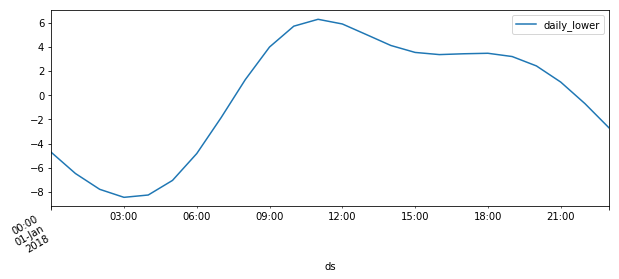

In [26]:
forecast['2018-01-01'][['daily_lower']].plot(subplots=True,figsize=(10,4))
plt.show()

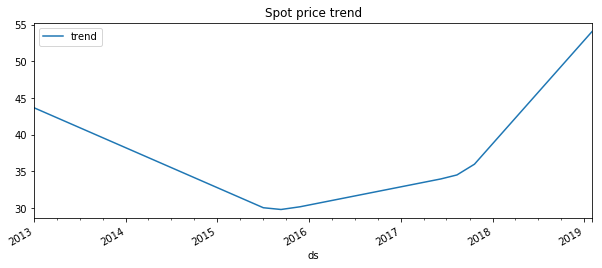

In [12]:
forecast[['trend']].plot(subplots=True,figsize=(10,4))
plt.title('Spot price trend')
plt.show()

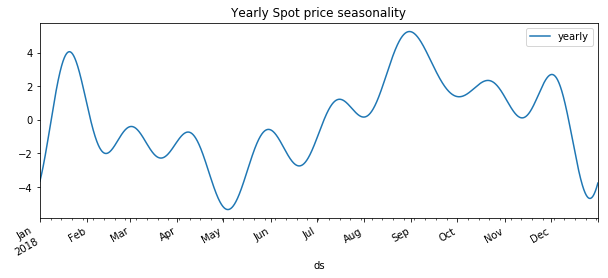

In [5]:
forecast['2018'][['yearly']].plot(subplots=True,figsize=(10,4))
plt.title('Yearly Spot price seasonality')
plt.show()

TypeError: from_bounds() missing 3 required positional arguments: 'y0', 'width', and 'height'

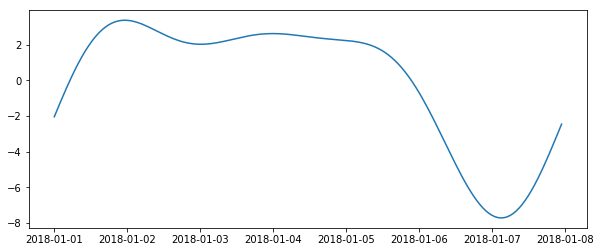

In [59]:
labels = ['MON','TUE','WED','THU','FRI','SAT','SUN','MON']
fig = plt.figure(figsize=(10,4))
line = plt.plot(forecast['2018-01-01':'2018-01-07'][['weekly']])
axes = plt.Axes(fig,line)
#forecast['2018-01-01':'2018-01-07'][['weekly']].plot(subplots=True,figsize=(10,4))
#plt.title('Weekly Spot price seasonality')
#plt.show()

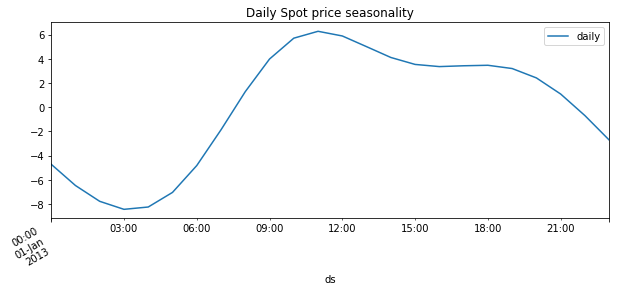

In [30]:
forecast['2013-01-01'][['daily']].plot(subplots=True,figsize=(10,4))
plt.title('Daily Spot price seasonality')
plt.show()

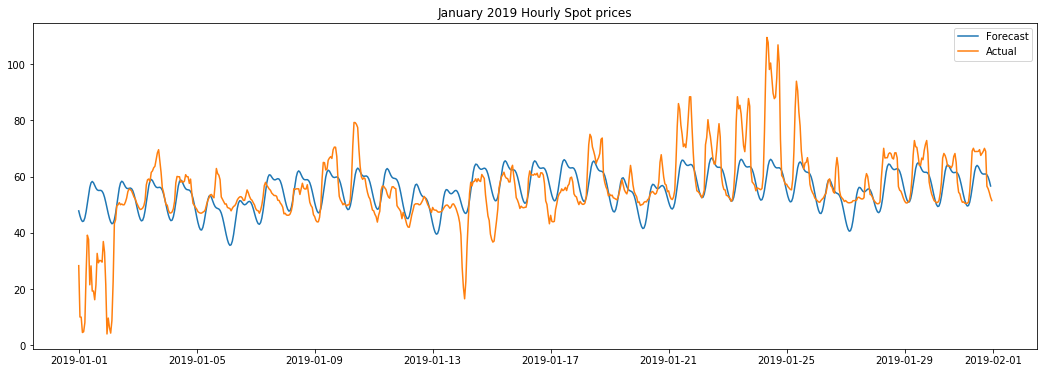

In [12]:
test_df = pd.read_pickle("test_df.pickle")
plt.subplots(figsize=(18,6))
plt.plot(forecast['2019-01-01':'2019-01-31'][['yhat']],label='Forecast')
plt.plot(test_df['2019-01-01':'2019-01-31'],label='Actual')
plt.legend()
plt.title('January 2019 Hourly Spot prices')
plt.show()

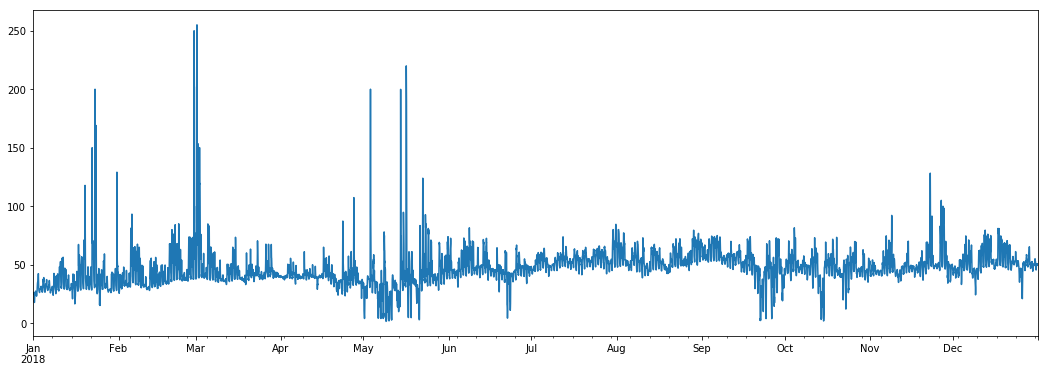

In [23]:
combined_df['2018']['Spot'].plot(figsize=(18,6))

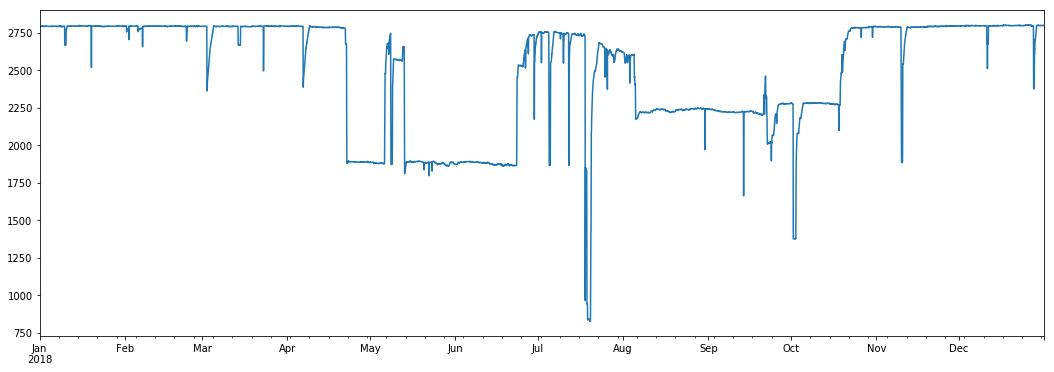

In [21]:
combined_df['2018']['Nuclear Power Production FI'].plot(figsize=(18,6))

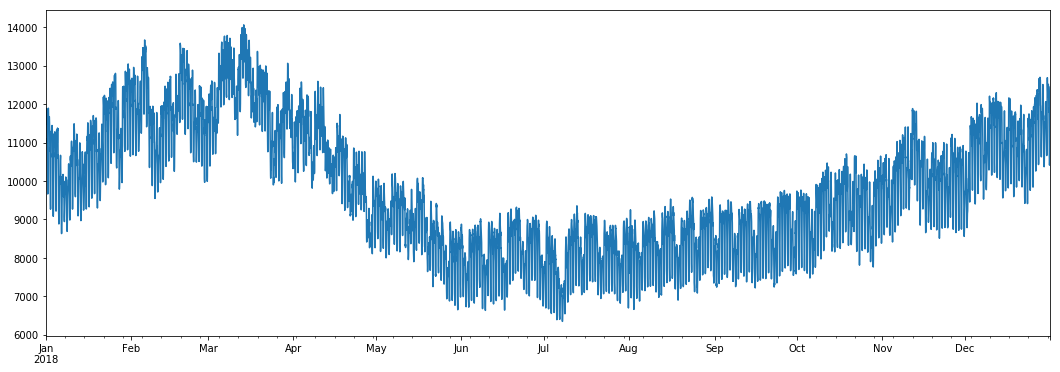

In [27]:
combined_df['2018']['Consumption'].plot(figsize=(18,6))

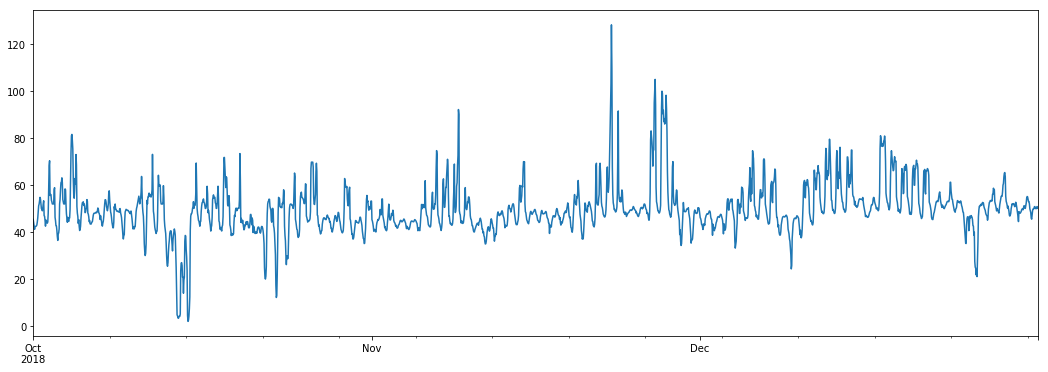

In [36]:
combined_df['2018-10-01':'2018-12-31']['Spot'].plot(figsize=(18,6))

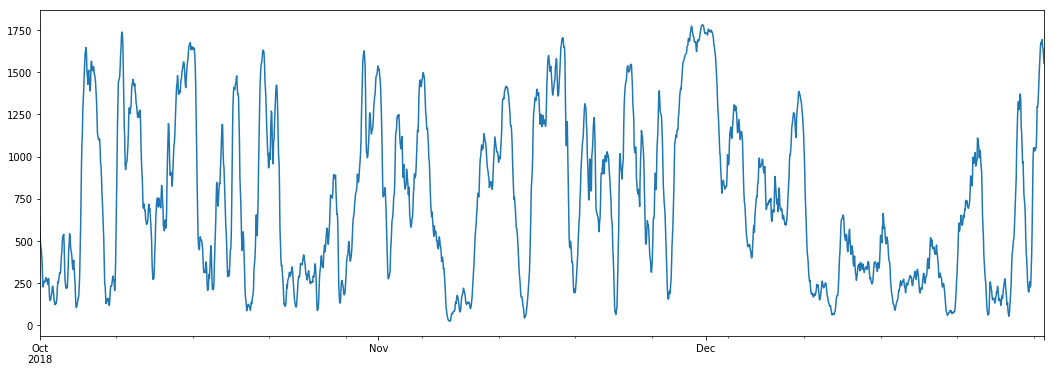

In [37]:
combined_df['2018-10-01':'2018-12-31']['Wind Power Production FI'].plot(figsize=(18,6))

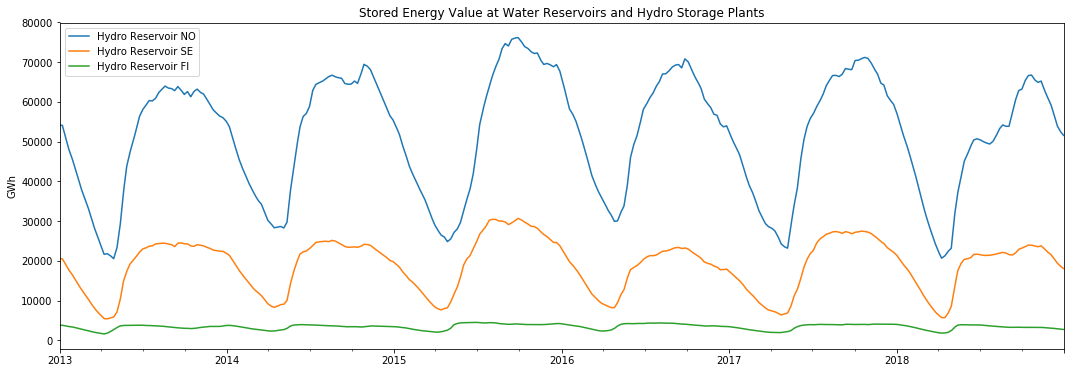

In [11]:
ax = combined_df[['Hydro Reservoir NO','Hydro Reservoir SE','Hydro Reservoir FI']].plot(figsize=(18,6))
ax.set_ylabel("GWh")
ax.set_title("Stored Energy Value at Water Reservoirs and Hydro Storage Plants")
plt.show()

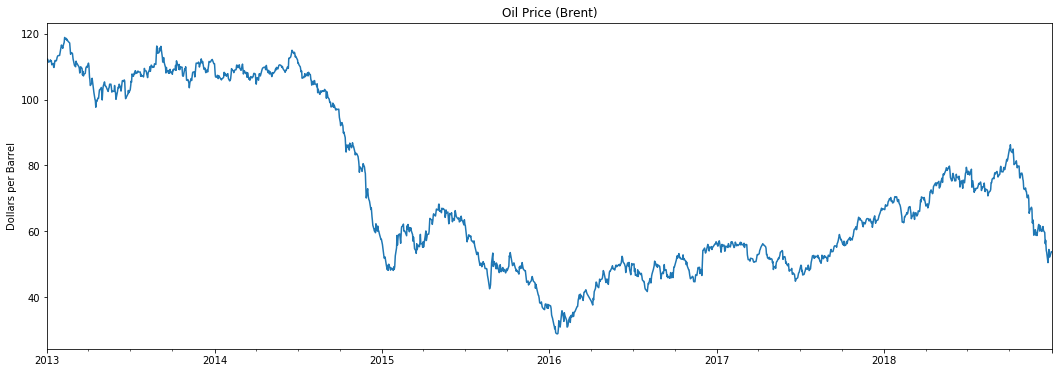

In [3]:
ax = combined_df['Oil'].plot(figsize=(18,6))
ax.set_ylabel("Dollars per Barrel")
ax.set_title("Oil Price (Brent)")
plt.show()

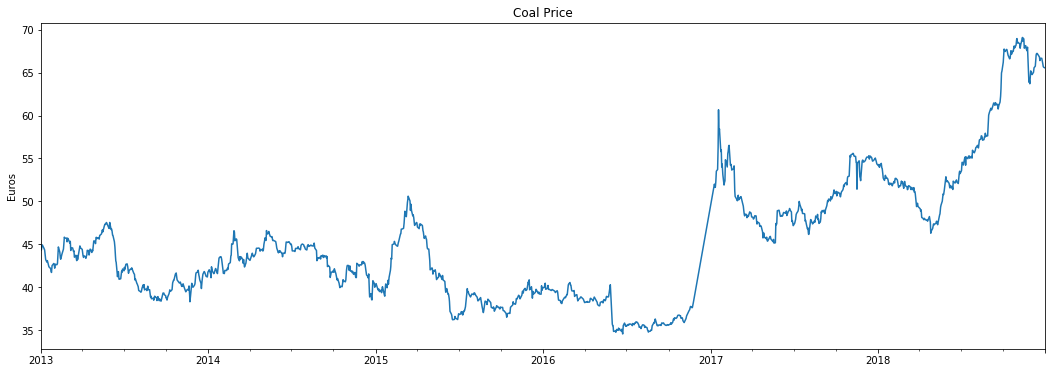

In [4]:
ax = combined_df['Coal'].plot(figsize=(18,6))
ax.set_ylabel("Euros")
ax.set_title("Coal Price")
plt.show()